# Cantaloupe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as  tf
import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
train = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set=train.flow_from_directory('/content/drive/MyDrive/Cantaloupe(AI)/train',
                                    target_size = (150,150),
                                    batch_size = 32,
                                    class_mode = 'categorical',
                                    )
validation_set=validation.flow_from_directory('/content/drive/MyDrive/Cantaloupe(AI)/validation',
                                        target_size = (150,150),
                                        batch_size = 32,
                                        class_mode = 'categorical',
                                        )

Found 1416 images belonging to 2 classes.
Found 421 images belonging to 2 classes.


In [ ]:
training_set.class_indices

{'Green': 0, 'Yellow': 1}

In [ ]:
model = tf.keras.models.Sequential(
    [ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape =(150,150,3)),
      tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),
     
      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),
     
      tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'),
      tf.keras.layers.MaxPool2D(2,2),
     
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128,activation = 'relu',kernel_initializer='he_uniform'),
      tf.keras.layers.Dense(2,activation='softmax')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 conv2d_13 (Conv2D)          (None, 150, 150, 16)      2320      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 conv2d_15 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                  

In [ ]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(training_set,batch_size=32,epochs=50,verbose=1, validation_data = validation_set)

Epoch 1/50
 1/45 [..............................] - ETA: 3:03 - loss: 0.7409 - accuracy: 0.4688

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


45/45 [==============================] - 233s 5s/step - loss: 0.4621 - accuracy: 0.7613 - val_loss: 0.3772 - val_accuracy: 0.7933
Epoch 2/50
45/45 [==============================] - 133s 3s/step - loss: 0.3179 - accuracy: 0.8665 - val_loss: 0.2023 - val_accuracy: 0.9382
Epoch 3/50
45/45 [==============================] - 132s 3s/step - loss: 0.2820 - accuracy: 0.8870 - val_loss: 0.2315 - val_accuracy: 0.9240
Epoch 4/50
45/45 [==============================] - 134s 3s/step - loss: 0.2157 - accuracy: 0.9244 - val_loss: 0.1396 - val_accuracy: 0.9525
Epoch 5/50
45/45 [==============================] - 134s 3s/step - loss: 0.1822 - accuracy: 0.9371 - val_loss: 0.1557 - val_accuracy: 0.9549
Epoch 6/50
45/45 [==============================] - 132s 3s/step - loss: 0.1598 - accuracy: 0.9421 - val_loss: 0.1728 - val_accuracy: 0.9382
Epoch 7/50
45/45 [==============================] - 136s 3s/step - loss: 0.2165 - accuracy: 0.9230 - val_loss: 0.1620 - val_accuracy: 0.9525
Epoch 8/50
45/45 [======

In [ ]:
score = model.evaluate(validation_set, verbose=1)
print('Sai số: ',score[0])
print('Độ chính xác: ',score[1])

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


14/14 [==============================] - 28s 2s/step - loss: 0.2285 - accuracy: 0.9454
Sai số:  0.2284916490316391
Độ chính xác:  0.9453681707382202


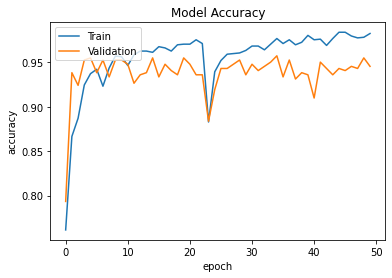

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [ ]:
model.save('Cantaloupe_AI.h5')
model.save('Cantaloupe_AI.sav')

INFO:tensorflow:Assets written to: Cantaloupe_AI.sav/assets


In [ ]:
from tensorflow.keras.models import load_model
model1=load_model('Cantaloupe_AI.h5')
model2=load_model('Cantaloupe_AI.sav')

Green


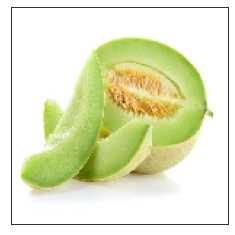

In [ ]:
classes=['Green','Yellow']
img=load_img('/content/drive/MyDrive/Cantaloupe(AI)/test/green2.jpg',target_size=(150,150))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])

Yellow


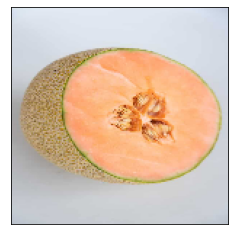

In [ ]:
img=load_img('/content/drive/MyDrive/Cantaloupe(AI)/test/yellow3.jpg',target_size=(150,150))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])